In [10]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
df_city = pd.read_csv(city_data_to_load)
df_ride = pd.read_csv(ride_data_to_load)

print(df_city.head(10))
print(df_city.shape)
print()
print(df_ride.head(10))
print(df_ride.shape)
print()
print(len(df_city["city"].unique()))
print(len(df_ride["city"].unique()))

import collections
# Check if they share exactly the same cities
assert collections.Counter(df_city["city"].unique()) == collections.Counter(df_ride["city"].unique())

            city  driver_count   type
0    Richardfort            38  Urban
1   Williamsstad            59  Urban
2    Port Angela            67  Urban
3     Rodneyfort            34  Urban
4    West Robert            39  Urban
5   West Anthony            70  Urban
6    West Angela            48  Urban
7  Martinezhaven            25  Urban
8      Karenberg            22  Urban
9    Barajasview            26  Urban
(120, 3)

                 city                 date   fare        ride_id
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344
5        South Latoya  2018-03-11 12:26:48   9.52  1994999424437
6       New Paulville  2018-02-27 11:17:56  43.25   793208410091
7        Simpsonburgh  2018-04-26 00:43:24  35.98   

In [11]:
# Combine the data into a single dataset
df_combined = pd.merge(df_ride, df_city, how="left", on="city")
#print(len(df_combined))

# Display the data table for preview
df_combined.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
city            2375 non-null object
date            2375 non-null object
fare            2375 non-null float64
ride_id         2375 non-null int64
driver_count    2375 non-null int64
type            2375 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


In [13]:
df_combined.describe()

,fare,ride_id,driver_count
count,2375.000000,2.375000e+03,2375.000000
mean,26.753112,4.887270e+12,28.930105
std,12.109465,2.907361e+12,20.666306
min,4.050000,3.218337e+08,1.000000
25%,17.190000,2.381175e+12,11.000000
50%,26.600000,4.748541e+12,23.000000
75%,36.645000,7.461936e+12,45.000000
max,58.550000,9.991538e+12,73.000000


## Bubble Plot of Ride Sharing Data

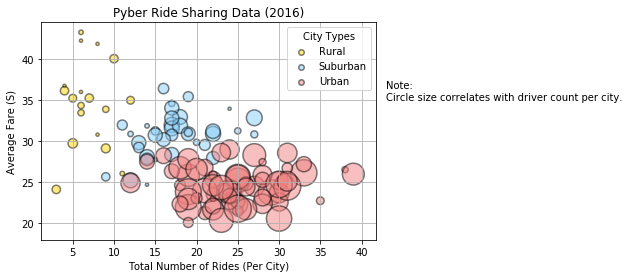

In [14]:
name_list = ["Rural", "Suburban", "Urban"]
color_list = ["gold", "lightskyblue", "lightcoral"]

x = df_combined.groupby(["type", "city"])["ride_id"].count()
y = df_combined.groupby(["type", "city"])["fare"].mean()
z = df_combined.groupby(["type", "city"])["driver_count"].mean()

for i in range(len(name_list)):
    plt.scatter(
        x.loc[name_list[i]],
        y.loc[name_list[i]],
        color=color_list[i],
        edgecolors="k",
        s=z.loc[name_list[i]] * 10,
        alpha=0.5, 
        linewidths=1.5,
    )

plt.grid()
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare (S)")
plt.title("Pyber Ride Sharing Data (2016)")
lgnd = plt.legend(labels=name_list, loc="upper right", title="City Types")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
textstr = "Note:\nCircle size correlates with driver count per city."
plt.text(43, 35, textstr, fontsize=10)

import os
plt.savefig(os.getcwd() + "/images/bubble_plot.png")
plt.show()

## Total Fares by City Type

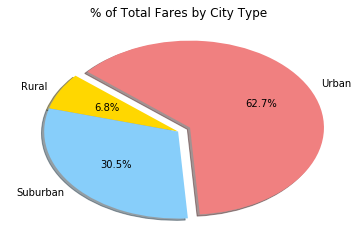

In [15]:
series_fare = df_combined.groupby("type")["fare"].sum()
explode = (0, 0, 0.1)

plt.pie(
    series_fare, 
    explode=explode, 
    labels=name_list, 
    colors=color_list, 
    autopct="%1.1f%%", 
    shadow=True, 
    startangle=140,
)

plt.title("% of Total Fares by City Type")
plt.savefig(os.getcwd() + "/images/pie_fares.png")
plt.show()

## Total Rides by City Type

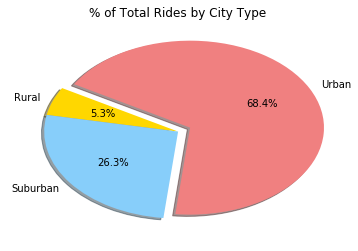

In [16]:
series_ride = df_combined.groupby("type")["ride_id"].count()
explode = (0, 0, 0.1)

plt.pie(
    series_ride, 
    explode=explode, 
    labels=name_list, 
    colors=color_list, 
    autopct="%1.1f%%", 
    shadow=True, 
    startangle=150,
)

plt.title("% of Total Rides by City Type")
plt.savefig(os.getcwd() + "/images/pie_rides.png")
plt.show()

## Total Drivers by City Type

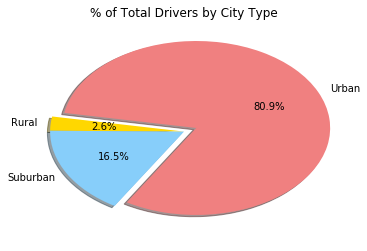

In [17]:
series_driver = df_city.groupby("type")["driver_count"].sum()
explode = (0, 0, 0.1)

plt.pie(
    series_driver, 
    explode=explode, 
    labels=name_list, 
    colors=color_list, 
    autopct="%1.1f%%", 
    shadow=True, 
    startangle=170,
)

plt.title("% of Total Drivers by City Type")
plt.savefig(os.getcwd() + "/images/pie_drivers.png")
plt.show()

# Three Observed Trends of the Data:

1. Rural rides have the highest average fares while urban rides have the lowest average fares.
2. The more drivers per city, the lower the fares. This explains Observation 1, since in average, there are more urban drivers than rural drivers.
3. Total fares and total rides are directly proportional to total number of drivers.